In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# **1. Data Preparation**

In [4]:
file1 = pd.read_csv("/content/drive/MyDrive/GENAI/Week4/Day5/pokemon.csv")
df1 = pd.DataFrame(file1)
df1.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [5]:
df1.isna().sum()

,0
#,0
Name,1
Type 1,0
Type 2,386
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0
Speed,0


In [6]:
df1.loc[df1["#"] == 63, "Name"] = "Primeape"

On attribut un nom au seul pokemon dont le nom n'est pas indiqué

In [7]:
df1.shape

(800, 12)

Le premier dataframe contient 800 pokémons ainsi que leurs caractéristiques

In [8]:
file2 = pd.read_csv("/content/drive/MyDrive/GENAI/Week4/Day5/combats.csv")
df2 = pd.DataFrame(file2)
df2.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [9]:
df2.shape

(50000, 3)

Le second dataframe contient 800 combats ainsi que le résultat de chacun d'entre eux

On vérifie que les features que nous allons utiliser pour faire les jointures ne contiennent pas de valeurs nuls

In [10]:
df1["#"].isna().sum()

np.int64(0)

In [11]:
df2.isna().mean() * 100

,0
First_pokemon,0.0
Second_pokemon,0.0
Winner,0.0


On merge les 2 dataframes pour avoir une ligne par combat, et avec les caractéristiques des 2 pokémons

In [12]:
df1_first = df1.copy()
df1_first.rename(columns={'#': 'pokemon'}, inplace=True)
df1_first.columns = ['First_' + col for col in df1_first.columns]
df_merged = df1_first.merge(df2, how='inner', on='First_pokemon')
df_merged.drop(columns=['Winner'], inplace=True)

In [13]:
df1_second = df1.copy()
df1_second.rename(columns={'#': 'pokemon'}, inplace=True)
df1_second.columns = ['Second_' + col for col in df1_second.columns]
df_merged2 = df1_second.merge(df2, how='inner', on='Second_pokemon')

In [14]:
pd.set_option('display.max_columns', None)
df = df_merged.merge(df_merged2, how='inner', on=['First_pokemon','Second_pokemon'])
df.drop(columns=['First_Name', 'Second_Name'], inplace=True)
df.drop_duplicates(inplace=True)
df.head()

,First_pokemon,First_Type 1,First_Type 2,First_HP,First_Attack,First_Defense,First_Sp. Atk,First_Sp. Def,First_Speed,First_Generation,First_Legendary,Second_pokemon,Second_Type 1,Second_Type 2,Second_HP,Second_Attack,Second_Defense,Second_Sp. Atk,Second_Sp. Def,Second_Speed,Second_Generation,Second_Legendary,Winner
0,1,Grass,Poison,45,49,49,65,65,45,1,False,679,Bug,NaN,80,70,40,100,60,145,5,False,679
1,1,Grass,Poison,45,49,49,65,65,45,1,False,687,Dark,Steel,65,125,100,60,70,70,5,False,687
3,1,Grass,Poison,45,49,49,65,65,45,1,False,557,Grass,NaN,75,75,95,75,95,113,5,False,557
4,1,Grass,Poison,45,49,49,65,65,45,1,False,766,Electric,Normal,62,55,52,109,94,109,6,False,766
5,1,Grass,Poison,45,49,49,65,65,45,1,False,153,Rock,Water,60,115,105,65,70,80,1,False,153


In [15]:
df[["First_Type 2", "Second_Type 2"]] = df[["First_Type 2", "Second_Type 2"]].fillna("None")

On remplace les valrus nuls dans type_2 par None

In [16]:
df.shape

(48048, 23)

Notre Dataframe final contient 48 048 combats avec les caractéristiques de chacun des combattants

In [17]:
df.isna().mean() * 100

,0
First_pokemon,0.0
First_Type 1,0.0
First_Type 2,0.0
First_HP,0.0
First_Attack,0.0
First_Defense,0.0
First_Sp. Atk,0.0
First_Sp. Def,0.0
First_Speed,0.0
First_Generation,0.0


Notre dataframe ne contient plus aucune valeur nul

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48048 entries, 0 to 53995
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   First_pokemon      48048 non-null  int64 
 1   First_Type 1       48048 non-null  object
 2   First_Type 2       48048 non-null  object
 3   First_HP           48048 non-null  int64 
 4   First_Attack       48048 non-null  int64 
 5   First_Defense      48048 non-null  int64 
 6   First_Sp. Atk      48048 non-null  int64 
 7   First_Sp. Def      48048 non-null  int64 
 8   First_Speed        48048 non-null  int64 
 9   First_Generation   48048 non-null  int64 
 10  First_Legendary    48048 non-null  bool  
 11  Second_pokemon     48048 non-null  int64 
 12  Second_Type 1      48048 non-null  object
 13  Second_Type 2      48048 non-null  object
 14  Second_HP          48048 non-null  int64 
 15  Second_Attack      48048 non-null  int64 
 16  Second_Defense     48048 non-null  int64 
 17

On calcule le pourcentage de victoire pour chaque pokemon

In [19]:
total_battles = (df2["First_pokemon"].value_counts() + df2["Second_pokemon"].value_counts()).rename("Total_Battles")
wins = df2["Winner"].value_counts().rename("Wins")
win_stats = pd.concat([total_battles, wins], axis=1).fillna(0)
win_stats["Wins"] = win_stats["Wins"].astype(int)
win_stats["Total_Battles"] = win_stats["Total_Battles"].astype(int)
win_stats["Win_Percentage"] = (win_stats["Wins"] / win_stats["Total_Battles"]) * 100
win_stats = win_stats.reset_index().rename(columns={"index": "#"})
id_to_name = dict(zip(df1["#"], df1["Name"]))
win_stats["Name"] = win_stats["#"].map(id_to_name)
win_stats = win_stats[["#", "Name", "Wins", "Total_Battles", "Win_Percentage"]]
win_stats

,#,Name,Wins,Total_Battles,Win_Percentage
0,1,Bulbasaur,37,133,27.819549
1,2,Ivysaur,46,121,38.016529
2,3,Venusaur,89,132,67.424242
3,4,Mega Venusaur,70,125,56.000000
4,5,Charmander,55,112,49.107143
...,...,...,...,...,...
779,796,Diancie,39,105,37.142857
780,797,Mega Diancie,116,131,88.549618
781,798,Hoopa Confined,60,119,50.420168
782,799,Hoopa Unbound,89,144,61.805556


On ajoute le pourcentage de victoire pour chaque pokemon dans notre dataframe

In [20]:
name_to_win = dict(zip(win_stats["#"], win_stats["Win_Percentage"]))
df["First_Win_Percentage"] = df["First_pokemon"].map(name_to_win)
df["Second_Win_Percentage"] = df["Second_pokemon"].map(name_to_win)

first_cols = [col for col in df.columns if col.startswith("First_") and col not in ["First_Win_Percentage"]]
second_cols = [col for col in df.columns if col.startswith("Second_") and col not in ["Second_Win_Percentage"]]

ordered_cols = (
    first_cols +
    ["First_Win_Percentage"] +
    second_cols +
    ["Second_Win_Percentage"] +
    ["Winner"]
)

df = df[ordered_cols]

In [21]:
df.head()

,First_pokemon,First_Type 1,First_Type 2,First_HP,First_Attack,First_Defense,First_Sp. Atk,First_Sp. Def,First_Speed,First_Generation,First_Legendary,First_Win_Percentage,Second_pokemon,Second_Type 1,Second_Type 2,Second_HP,Second_Attack,Second_Defense,Second_Sp. Atk,Second_Sp. Def,Second_Speed,Second_Generation,Second_Legendary,Second_Win_Percentage,Winner
0,1,Grass,Poison,45,49,49,65,65,45,1,False,27.819549,679,Bug,None,80,70,40,100,60,145,5,False,92.187500,679
1,1,Grass,Poison,45,49,49,65,65,45,1,False,27.819549,687,Dark,Steel,65,125,100,60,70,70,5,False,60.992908,687
3,1,Grass,Poison,45,49,49,65,65,45,1,False,27.819549,557,Grass,None,75,75,95,75,95,113,5,False,90.151515,557
4,1,Grass,Poison,45,49,49,65,65,45,1,False,27.819549,766,Electric,Normal,62,55,52,109,94,109,6,False,78.333333,766
5,1,Grass,Poison,45,49,49,65,65,45,1,False,27.819549,153,Rock,Water,60,115,105,65,70,80,1,False,71.818182,153


In [22]:
winner = win_stats[win_stats["Win_Percentage"] == win_stats["Win_Percentage"].max()]["Name"]

In [23]:
looser = win_stats[win_stats["Win_Percentage"] == win_stats["Win_Percentage"].min()]["Name"]

In [24]:
print(f"Le pokemon qui a gagné le plus de combats est {winner.values[0]} et celui qui a gagné le moins de combats est {looser.values[0]}")

Le pokemon qui a gagné le plus de combats est Mega Aerodactyl et celui qui a gagné le moins de combats est Shuckle


On ajoute le pourcentage de victoire au dataframe initial

In [25]:
df1_with_win = df1.merge(win_stats[["#", "Win_Percentage"]], on="#", how="left")
df1_with_win.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Win_Percentage
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,27.819549
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,38.016529
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,67.424242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,56.000000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,49.107143


In [39]:
df1_with_win.isna().sum()

,0
#,0
Name,0
Type 1,0
Type 2,386
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0
Speed,0


In [40]:
df1_with_win["Type 2"] = df1_with_win["Type 2"].fillna("None")

In [42]:
df1_with_win.dropna(inplace=True)

In [43]:
df1_with_win.isna().sum()

,0
#,0
Name,0
Type 1,0
Type 2,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0
Speed,0


# **2. Exploratory Analysis & Visualization**

On crée une matrice de corrélation pour identifer les liens entre le pourcentage de victoire et les stats suivantes : HP, Attack et Speed

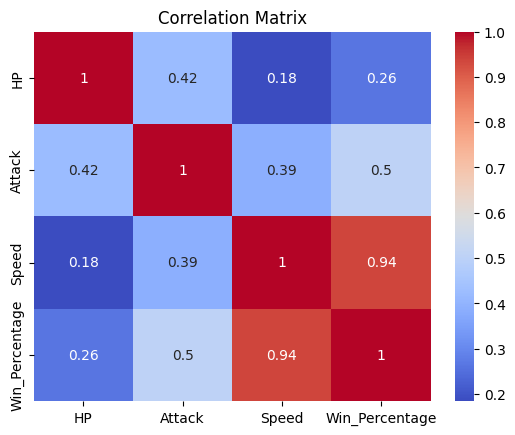

In [44]:
corr_data = df1_with_win[["HP", "Attack", "Speed", "Win_Percentage"]]
corr_matrix = corr_data.corr()

plt.plot(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

La vitesse est fortement corrélée au taux de victoire (0.94), ce qui en fait la statistique la plus déterminante. L’attaque a un impact modéré (0.50), tandis que les points de vie (HP) jouent un rôle secondaire (0.26). Les Pokémon rapides gagnent nettement plus souvent.

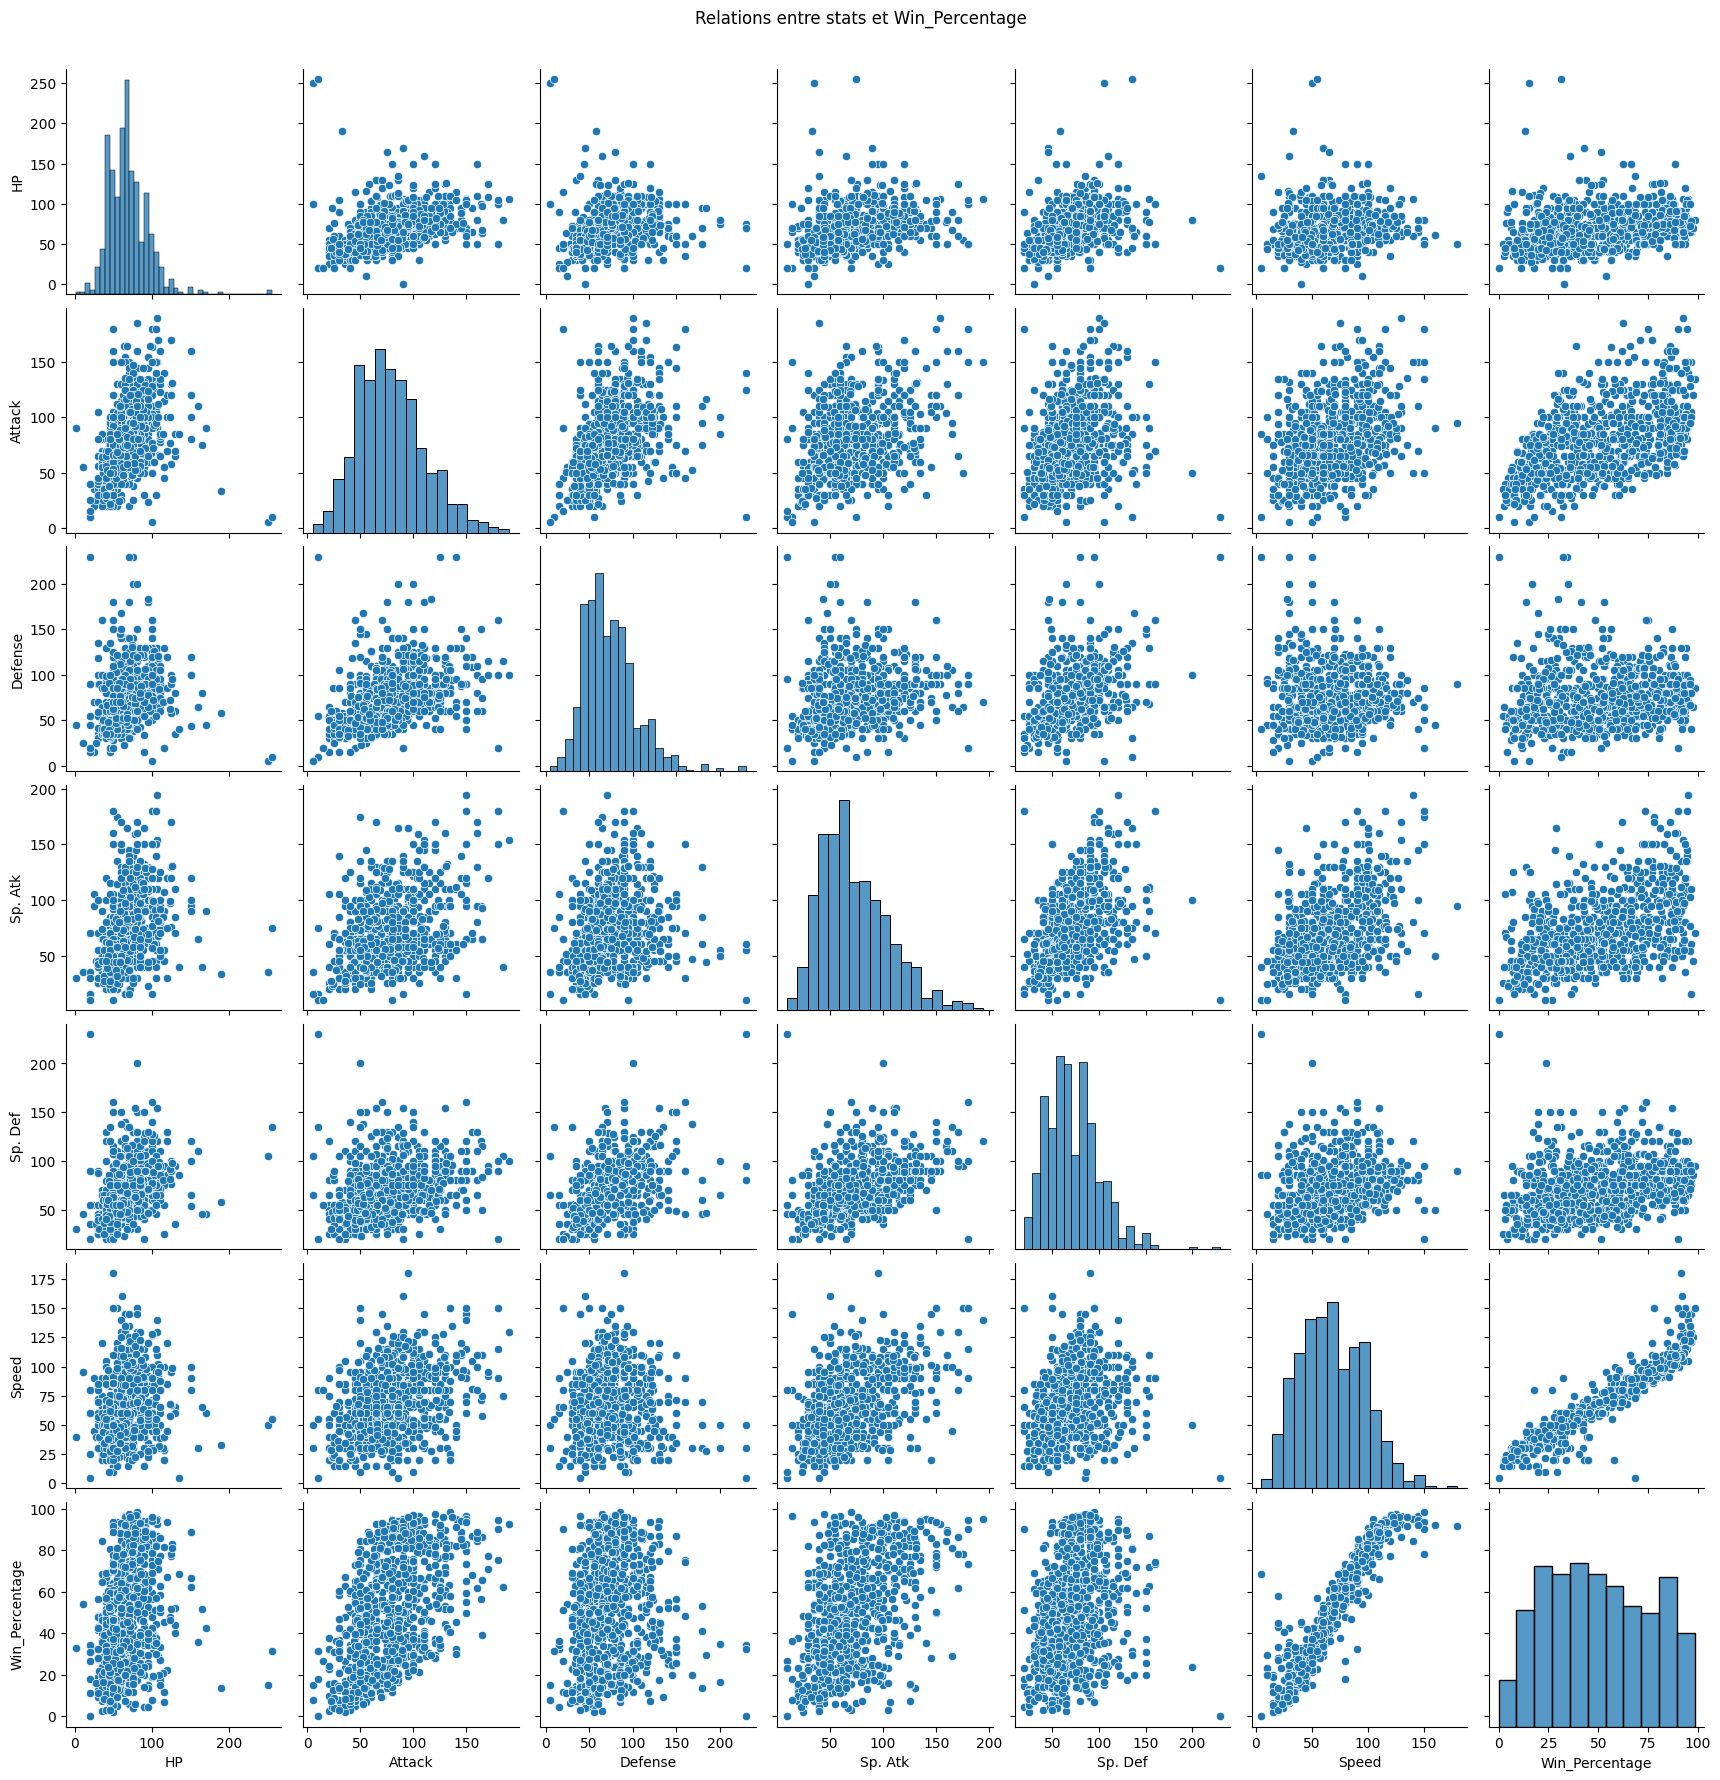

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

stats_cols = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Win_Percentage"]

sns.pairplot(df1_with_win[stats_cols])
plt.suptitle("Relations entre stats et Win_Percentage", y=1.02)
plt.show()

Le pairplot montre une forte relation entre Speed et Win_Percentage : plus un Pokémon est rapide, plus il gagne. Attack a un impact modéré, tandis que HP, Defense et les stats spéciales n’ont pas de lien clair avec le taux de victoire.

In [47]:
top10 = df1_with_win.sort_values("Win_Percentage", ascending=False).head(10)
top10

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Win_Percentage
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,False,98.449612
512,513,Weavile,Dark,Ice,70,120,65,45,85,125,4,False,97.478992
703,704,Tornadus Therian Forme,Flying,None,79,100,80,110,90,121,5,True,96.800000
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,96.638655
153,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,1,False,96.453901
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,4,False,96.124031
726,727,Greninja,Water,Dark,72,95,67,103,71,122,6,False,96.062992
716,717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,5,False,95.934959
164,165,Mega Mewtwo Y,Psychic,None,106,150,70,194,120,140,1,True,95.200000
349,350,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,3,False,95.000000


Les Pokémon du top 10 sont tous très rapides (souvent >120 en Speed) et très offensifs. Leur haute vitesse leur permet de frapper en premier, ce qui explique leurs taux de victoire élevés.

# **Machine Learning**

On sépare nos données en set d'entrainements et de test dans l'objectif de prédire le pourcentage de victoire à partir des statistiques

In [48]:
df_ml = df1_with_win[["Speed", "Attack", "Win_Percentage"]]
df_ml.head()

,Speed,Attack,Win_Percentage
0,45,49,27.819549
1,60,62,38.016529
2,80,82,67.424242
3,80,100,56.000000
4,65,52,49.107143


In [50]:
from sklearn.model_selection import train_test_split

X = df_ml.drop("Win_Percentage", axis=1)
y = df_ml["Win_Percentage"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

On entraine nos 3 modèles de regression, Gradient boost, random forest et KNN, sur nos données d'entrainements. On effectue par la suite les prédictions sur nos données de test.

In [68]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

gb = GradientBoostingRegressor()
lr = LinearRegression()
rf = RandomForestRegressor()

gb.fit(x_train, y_train)
lr.fit(x_train, y_train)
rf.fit(x_train, y_train)

y_pred_gb = gb.predict(x_test)
y_pred_lr = lr.predict(x_test)
y_pred_rf = rf.predict(x_test)

In [69]:
from sklearn.metrics import mean_absolute_error

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Mean Absolute Error (MAE) :")
print(f"Gradient Boosting : {mae_gb:.2f}")
print(f"Linear Regression : {mae_lr:.2f}")
print(f"Random Forest     : {mae_rf:.2f}")

Mean Absolute Error (MAE) :
Gradient Boosting : 4.20
Linear Regression : 6.21
Random Forest     : 4.49


Le modèle Gradient Boosting offre la meilleure performance avec une MAE de 4.20. Le modèle Random Forest suit avec une erreur moyenne de 4.49, tandis que la régression linéaire obtient la moins bonne performance avec une MAE de 6.21. Cela indique que les modèles non linéaires s’adaptent mieux à la complexité des données